In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### pokemon

In [2]:
f = '/projects/trans_scratch/validations/workspace/szong/development/data/moves.csv'
df = pd.read_csv(f, sep='\t') #df is a data frame, basically an excel table
df.shape # show number of rows and columns (#rows, #columns)
df.head(2) # list first 2 rows
df.columns # show all column names

(746, 16)

,id,identifier,generation_id,type_id,power,pp,accuracy,priority,target_id,damage_class_id,effect_id,effect_chance,contest_type_id,contest_effect_id,super_contest_effect_id,pokemon_habitat_id
0,1,pound,1,1,40.0,35.0,100.0,0,10,2,1,NaN,5.0,1.0,5.0,1
1,2,karate-chop,1,2,50.0,25.0,100.0,0,10,2,44,NaN,5.0,2.0,5.0,7


Index(['id', 'identifier', 'generation_id', 'type_id', 'power', 'pp',
       'accuracy', 'priority', 'target_id', 'damage_class_id', 'effect_id',
       'effect_chance', 'contest_type_id', 'contest_effect_id',
       'super_contest_effect_id', 'pokemon_habitat_id'],
      dtype='object')

In [3]:
# you can run linux command by prefix the command with a '!', like what you do in a terminal
! head -5 /projects/trans_scratch/validations/workspace/szong/development/data/moves.csv
! wc -l /projects/trans_scratch/validations/workspace/szong/development/data/moves.csv

id	identifier	generation_id	type_id	power	pp	accuracy	priority	target_id	damage_class_id	effect_id	effect_chance	contest_type_id	contest_effect_id	super_contest_effect_id	pokemon_habitat_id
1	pound	1	1	40.0	35.0	100.0	0	10	2	1		5.0	1.0	5.0	1
2	karate-chop	1	2	50.0	25.0	100.0	0	10	2	44		5.0	2.0	5.0	7
3	double-slap	1	1	15.0	10.0	85.0	0	10	2	30		5.0	10.0	7.0	7
4	comet-punch	1	1	18.0	15.0	85.0	0	10	2	30		5.0	12.0	7.0	9
747 /projects/trans_scratch/validations/workspace/szong/development/data/moves.csv


In [4]:
# select a few columns
df[['id', 'identifier', 'generation_id']].head(2)

,id,identifier,generation_id
0,1,pound,1
1,2,karate-chop,1


In [5]:
# select a few rows
df.iloc[1, 1]
df.iloc[:5, :5]

'karate-chop'

,id,identifier,generation_id,type_id,power
0,1,pound,1,1,40.0
1,2,karate-chop,1,2,50.0
2,3,double-slap,1,1,15.0
3,4,comet-punch,1,1,18.0
4,5,mega-punch,1,1,80.0


##### how many different types of pokemon do we have here?

#### what are they?

In [9]:
df.type_id.unique()

array([    1,     2,    10,    15,    13,     3,    12,     5,     4,
           7,    17,    11,    14,    16,     6,     8,    18,     9,
       10002])

In [4]:
df.type_id.unique() # show unique values in column 'type_id' of data frame 'df'
df.type_id.nunique() # show number of unique values in column 'type_id' of data frame 'df'

array([    1,     2,    10,    15,    13,     3,    12,     5,     4,
           7,    17,    11,    14,    16,     6,     8,    18,     9,
       10002])

19

##### which pokemon has the most power? show the power distribuation in a graph

In [13]:
df.power.unique()
df.power.max()
df[df.power == 250]

array([ 40.,  50.,  15.,  18.,  80.,  75.,  55.,  nan,  60.,  90.,  45.,
        65.,  30., 120., 100.,  70.,  85.,  25., 110., 150.,  35.,  20.,
       200., 130.,  10., 140., 250.,  95., 180., 210., 125., 195., 175.,
       185., 160., 190.])

250.0

,id,identifier,generation_id,type_id,power,pp,accuracy,priority,target_id,damage_class_id,effect_id,effect_chance,contest_type_id,contest_effect_id,super_contest_effect_id,pokemon_habitat_id
152,153,explosion,1,1,250.0,5.0,100.0,0,9,2,8,NaN,2.0,7.0,9.0,6


In [5]:
df.power.max() # show the maximum value in column 'power' of data frame 'df'

250.0

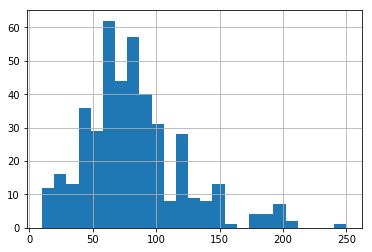

In [14]:
df.power.hist(bins=25) # plot histogram of values in column power

### exercise

#### what are the damage classes we see in these pokemon?

In [20]:
df.damage_class_id.unique()


array([2, 3, 1])

#### how much pokemon do we have in this data set?

In [22]:
df.shape

(746, 16)

#### how many generations of pokemon do we have?

In [25]:
df.generation_id.unique()

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
716    7
717    7
718    7
719    7
720    7
721    7
722    7
723    7
724    7
725    7
726    7
727    7
728    3
729    3
730    3
731    3
732    3
733    3
734    3
735    3
736    3
737    3
738    3
739    3
740    3
741    3
742    3
743    3
744    3
745    3
Name: generation_id, Length: 746, dtype: int64>

### pokemon habitats

In [7]:
f2 = '/projects/trans_scratch/validations/workspace/szong/development/data/pokemon_habitat_names.csv'
df2 = pd.read_csv(f2, sep='\t')
df2.head(2)
df2.shape

df2.name.unique()

,pokemon_habitat_id,local_language_id,name
0,1,5,grottes
1,1,9,cave


(18, 3)

array(['grottes', 'cave', 'forêts', 'forest', 'champs', 'grassland',
       'montagnes', 'mountain', 'rares', 'rare', 'milieux hostiles',
       'rough terrain', 'mers', 'sea', 'urbains', 'urban', 'marécages',
       "water's edge"], dtype=object)

sometimes, we need merge to tables because the information we need spread in them. To merge two tables, we need to find one column in each table where the same type of information is recorded, for example a person's full name.

In this case, both tables have a column called "pokemon_habitat_id". we could merge based on this column.

In [8]:
dfm = df.merge(df2, left_on='pokemon_habitat_id', right_on= 'pokemon_habitat_id', how='outer')
dfm.head(2)

,id,identifier,generation_id,type_id,power,pp,accuracy,priority,target_id,damage_class_id,effect_id,effect_chance,contest_type_id,contest_effect_id,super_contest_effect_id,pokemon_habitat_id,local_language_id,name
0,1,pound,1,1,40.0,35.0,100.0,0,10,2,1,NaN,5.0,1.0,5.0,1,5,grottes
1,1,pound,1,1,40.0,35.0,100.0,0,10,2,1,NaN,5.0,1.0,5.0,1,9,cave


### excercise

#### where do the following pokemon live? what local language do they speak?

plasma-fists  
photon-geyser  
light-that-burns-the-sky  
searing-sunraze-smash  
menacing-moonraze-maelstrom  
lets-snuggle-forever